# 1.4.12 Template Matching
## Template Matching in OpenCV

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

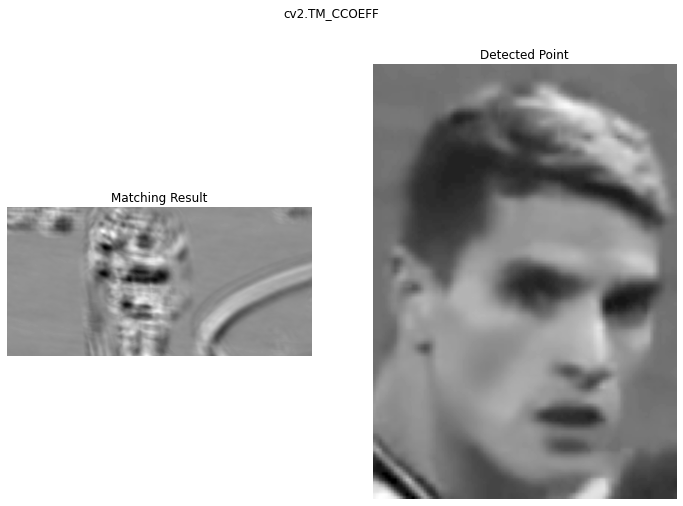

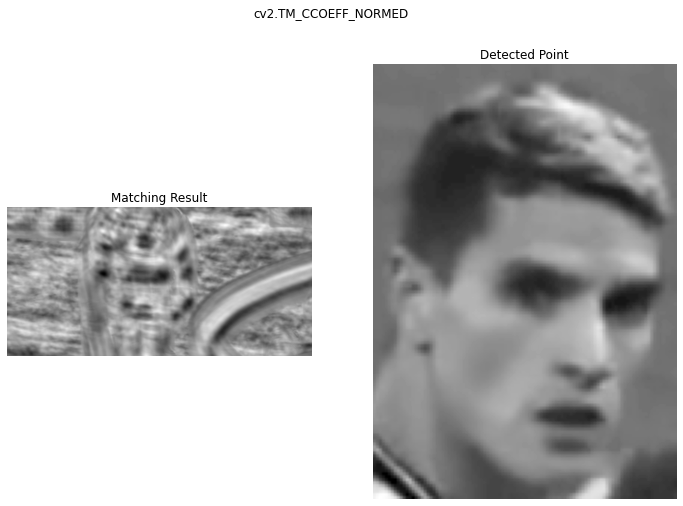

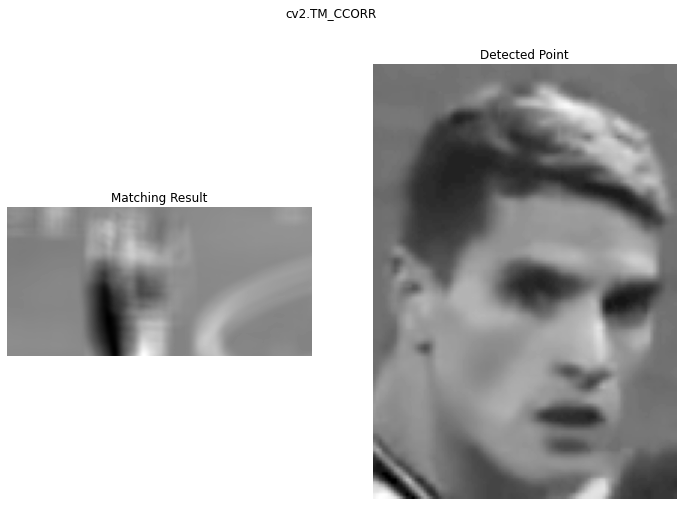

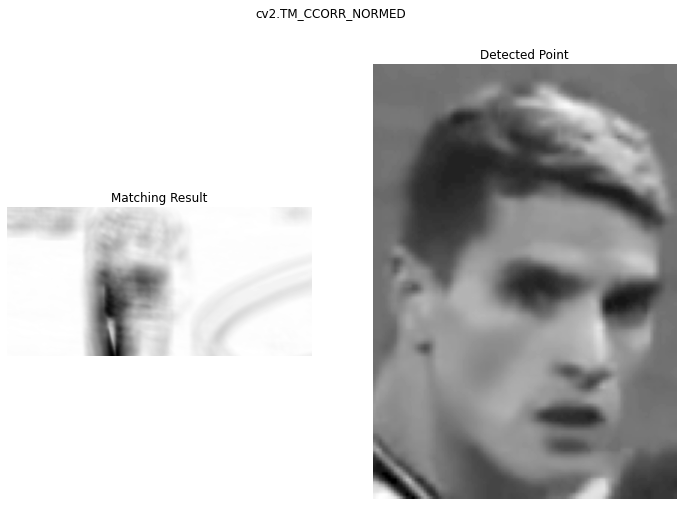

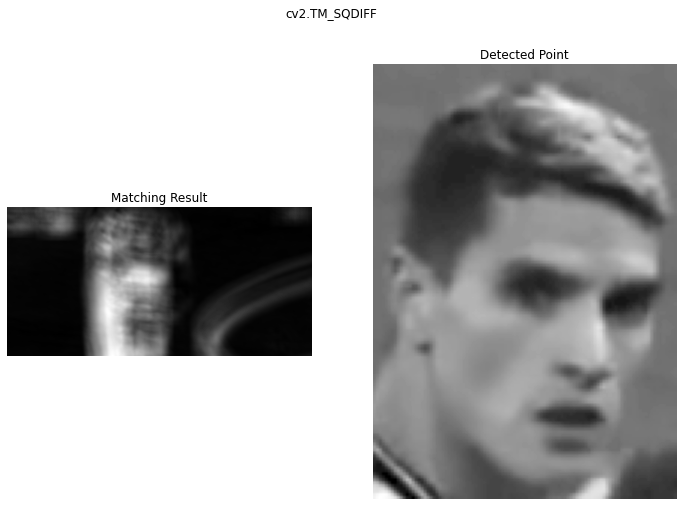

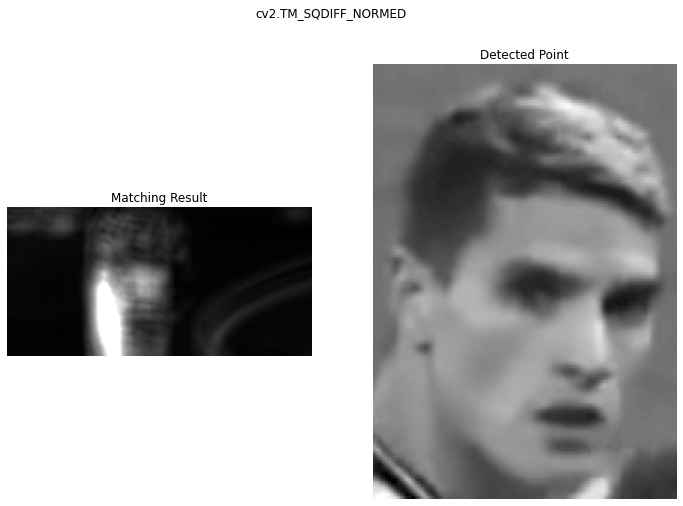

In [6]:
img = cv2.imread('face.png',0)
img2 = img.copy()
template = cv2.imread('hu.png',0)
w,h = template.shape[::-1]

methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for i,meth in enumerate(methods):
    img = img2.copy()
    method = eval(meth)
    
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    
    cv2.rectangle(img,top_left,bottom_right,255,2)
    
    plt.figure(figsize=(12,8))
    plt.subplot(121), plt.imshow(res,cmap='gray')
    plt.title("Matching Result"), plt.axis('off')
    plt.subplot(122), plt.imshow(img,cmap='gray')
    plt.title("Detected Point"), plt.axis('off')
    plt.suptitle(meth)
    plt.savefig('total_res{0}.jpg'.format(i))
    plt.show()
 

## Template Matching with Multiple Objects

In [16]:
img_rgb = cv2.imread('face.png')
img_gray = cv2.cvtColor(img_rgb,cv2.COLOR_BGR2GRAY)
template = cv2.imread('hu.png',0)
w,h = template.shape[::-1]

res = cv2.matchTemplate(img_gray, template,cv2.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where(res>=threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb,pt,(pt[0]+w,pt[1]+h),(0,255,0),2)
cv2.imwrite('result_res.png',img_rgb)

True